Regression models are used since we have to predict Average combat score- since MOST VALUBALE PLAYER mainly depends on what ACS is of the player. Since it is a continuous score, only regression models will be used

## Linear regression 


Linear regression modelling on dataset of players from all regions with different variables recorded in their performance in different competitive matches so far.

In [569]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
%matplotlib inline
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
plt.style.use("ggplot")
import xgboost as xgb
from sklearn import metrics
import lightgbm as ltb

In [570]:
#importing the dataset
dataset=pd.read_csv('pdata.csv')
dataset.shape

(4483, 8)

In [571]:
#displaying the dataset
dataset.describe
dataset

,Player name,rndplayes,acs,kdratio,hspercent,clpercent,aspr,kmax
0,something,364,297.4,1.45,0.21,0.12,0.16,43
1,enerii,737,296.0,1.43,0.23,0.18,0.25,39
2,alcoacH,131,291.5,1.30,0.30,0.09,0.18,27
3,Kohaibi,529,283.5,1.44,0.22,0.22,0.20,33
4,mwzera,2417,277.9,1.32,0.16,0.17,0.22,38
...,...,...,...,...,...,...,...,...
4478,zikkan,114,108.7,0.48,0.17,0.05,0.24,11
4479,Fawzz,110,106.6,0.48,0.20,0.10,0.15,19
4480,highonlifekk,123,106.3,0.49,0.16,0.08,0.25,11
4481,Palo,109,99.7,0.31,0.21,0.12,0.25,10


In [572]:
#since player name is ID, we drop it from the dataset for training and testing
x1=dataset.drop('Player name',axis=1)
x=x1.astype(float)
x=x1.drop('acs',axis=1)
x

,rndplayes,kdratio,hspercent,clpercent,aspr,kmax
0,364,1.45,0.21,0.12,0.16,43
1,737,1.43,0.23,0.18,0.25,39
2,131,1.30,0.30,0.09,0.18,27
3,529,1.44,0.22,0.22,0.20,33
4,2417,1.32,0.16,0.17,0.22,38
...,...,...,...,...,...,...
4478,114,0.48,0.17,0.05,0.24,11
4479,110,0.48,0.20,0.10,0.15,19
4480,123,0.49,0.16,0.08,0.25,11
4481,109,0.31,0.21,0.12,0.25,10


In [573]:
#as linear regression is based on dependent and independent variables- ACS is dependent variable
y=x1['acs']
y

0       297.4
1       296.0
2       291.5
3       283.5
4       277.9
        ...  
4478    108.7
4479    106.6
4480    106.3
4481     99.7
4482     82.5
Name: acs, Length: 4483, dtype: float64

Text(0, 0.5, 'acs')

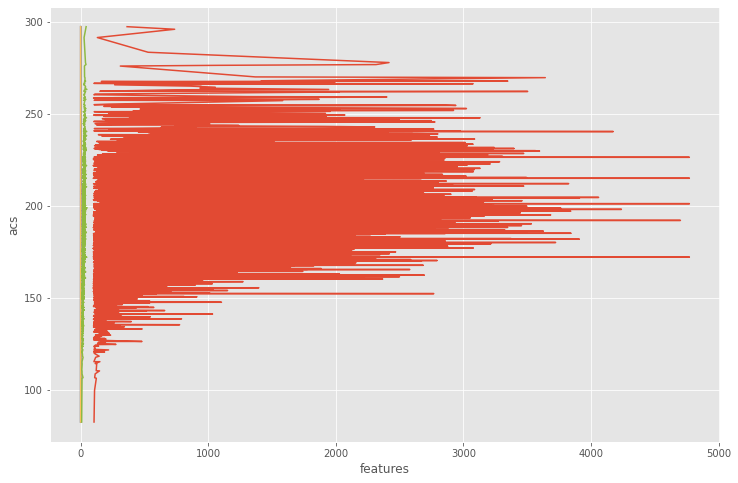

In [574]:
plt.plot(x,y)
plt.xlabel("features")
plt.ylabel("acs")

In [575]:
print(y.shape)
print(x.shape)
x=np.nan_to_num(x)


(4483,)
(4483, 6)


In [576]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [577]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [578]:
y_prediction =  LR.predict(x_test)
print(y_prediction)

[184.62425537 192.66063276 163.33115304 189.08308088 191.04192624
 196.76396555 207.26286549 201.6326512  202.39947299 179.35858902
 225.19268926 194.51578787 202.22419672 172.2145217  171.38445156
 190.70869194 164.16126237 200.47914564 129.71836309 193.45330426
 208.41130081 207.67156843 200.13463556 195.38339328 169.94760129
 180.20760376 195.54070094 184.13714876 208.24225488 160.53083838
 168.65821151 200.80290121 138.80171733 193.66137363 182.36095988
 168.84481419 201.39086065 200.29889809 208.13988753 189.94932712
 177.65744877 207.33668601 192.42658259 206.89600526 198.64801833
 200.81496348 192.08804071 171.93312074 190.93578518 127.85987719
 174.40997034 186.35898461 203.20877501 177.31957622 192.92406767
 203.0002597  177.36759932 184.75059907 174.60773178 162.46553921
 201.74434281 151.00827093 171.48356134 151.71002734 158.27438484
 164.55413056 226.84731903 187.02456172 197.44525406 160.2070109
 167.70246625 212.33000328 181.34090198 196.77640462 189.75160405
 165.289352

In [579]:
 #importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 score is ",score)
print("mean squared error is",mean_squared_error(y_test,y_prediction))
print("root mean squared error is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.7872768397469811
mean squared error is 147.6780472707196
root mean squared error is 12.152285680921082


In [580]:
lrslop=LR.intercept_
lrcoef=LR.coef_
print(lrcoef)
print(lrslop)


[-5.65502556e-03  1.46425450e+02 -3.45120231e+01 -2.16751771e+01
 -3.73080255e+01  5.83608415e-01]
71.41892542676936


In [581]:
y_prediction=LR.predict(x_test)

In [582]:
df = pd.DataFrame({'Actual': y_test,'Predicted': y_prediction})
df

,Actual,Predicted
2972,176.3,184.624255
2512,182.9,192.660633
2887,177.5,163.331153
2412,184.4,189.083081
3197,172.9,191.041926
...,...,...
168,238.1,229.965736
2358,185.0,176.406234
2659,180.7,173.437222
954,208.7,195.083221


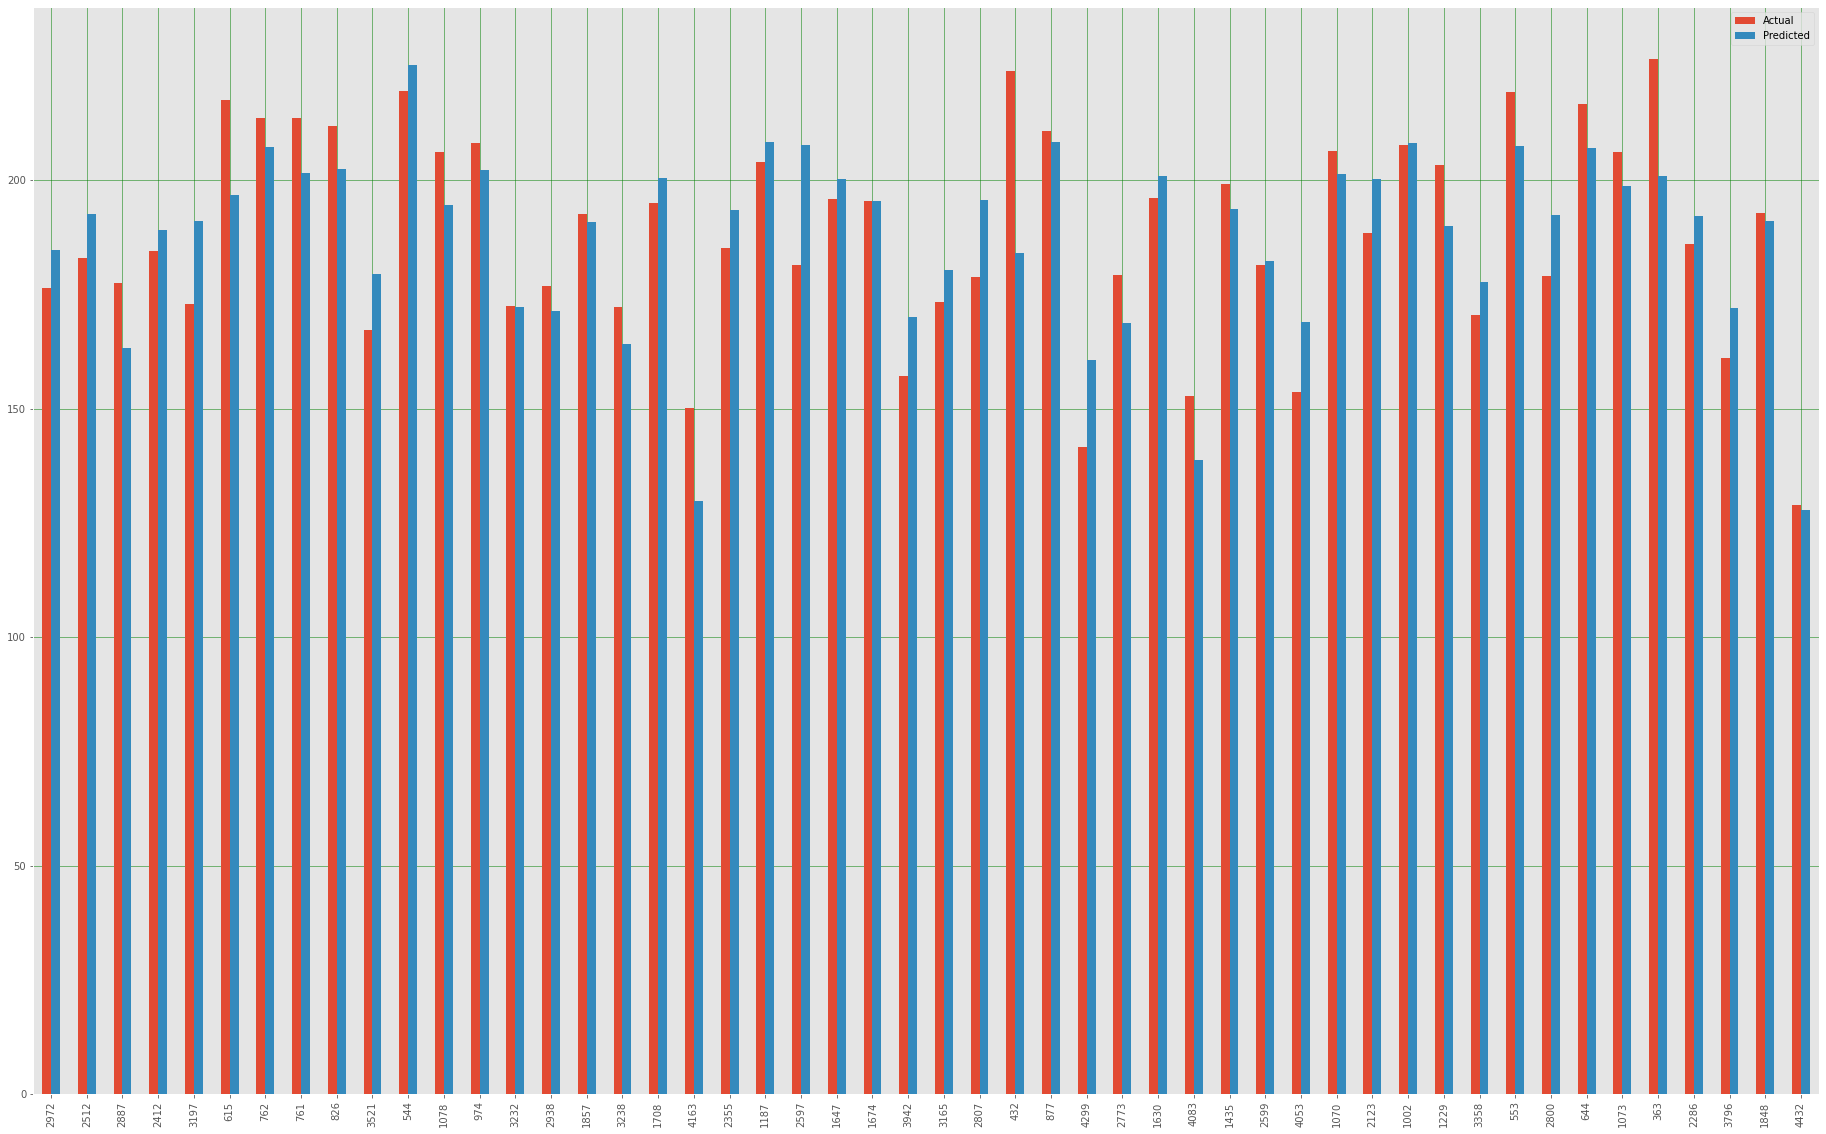

In [583]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(32,20))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [584]:
df=dataset.columns
print(df)
col=df.tolist()
print(col)
col.remove('Player name')
col.remove('acs')

Index(['Player name', 'rndplayes', 'acs', 'kdratio', 'hspercent', 'clpercent',
       'aspr', 'kmax'],
      dtype='object')
['Player name', 'rndplayes', 'acs', 'kdratio', 'hspercent', 'clpercent', 'aspr', 'kmax']


<BarContainer object of 6 artists>

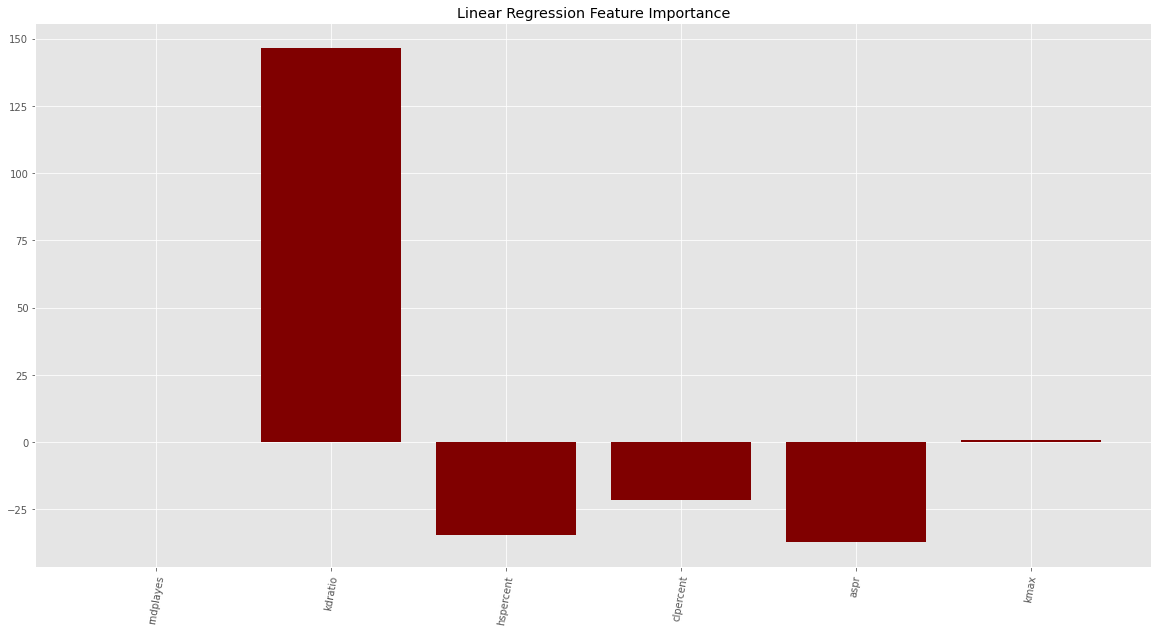

In [585]:
plt.figure(figsize=(20,10))
plt.title('Linear Regression Feature Importance')
plt.xticks(rotation=80)
plt.bar(col,lrcoef,color='maroon')

## Lasso regression

In [586]:
import random
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10


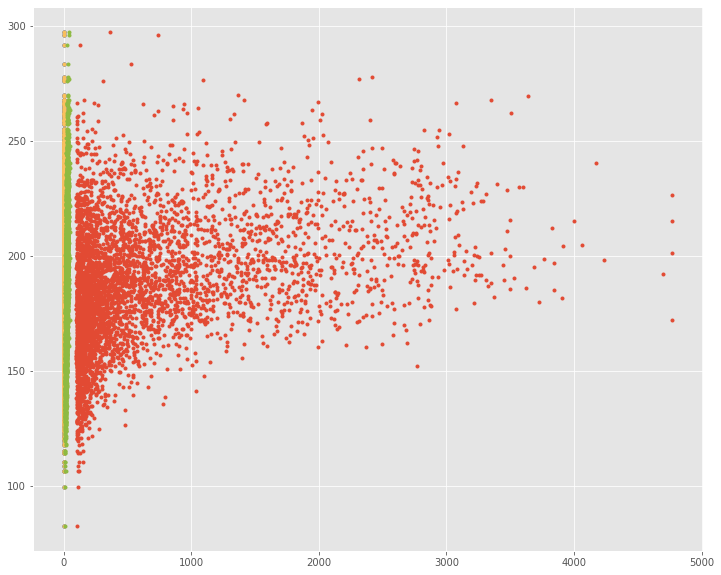

In [587]:
plt.plot(x,y,'.')

In [588]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [589]:
from sklearn.linear_model import LassoCV
#setting up model on train set
lasso_model = Lasso().fit(x_train,y_train)

In [590]:
lasso_model.intercept_

88.99029635513432

In [591]:
lasso_model.coef_

array([-4.22971052e-03,  5.94841780e+01, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.12802286e+00])

In [592]:
lasso_model.score(x_test, y_test), lasso_model.score(x_train, y_train)

(0.6507182715148663, 0.6735791428643134)

<BarContainer object of 6 artists>

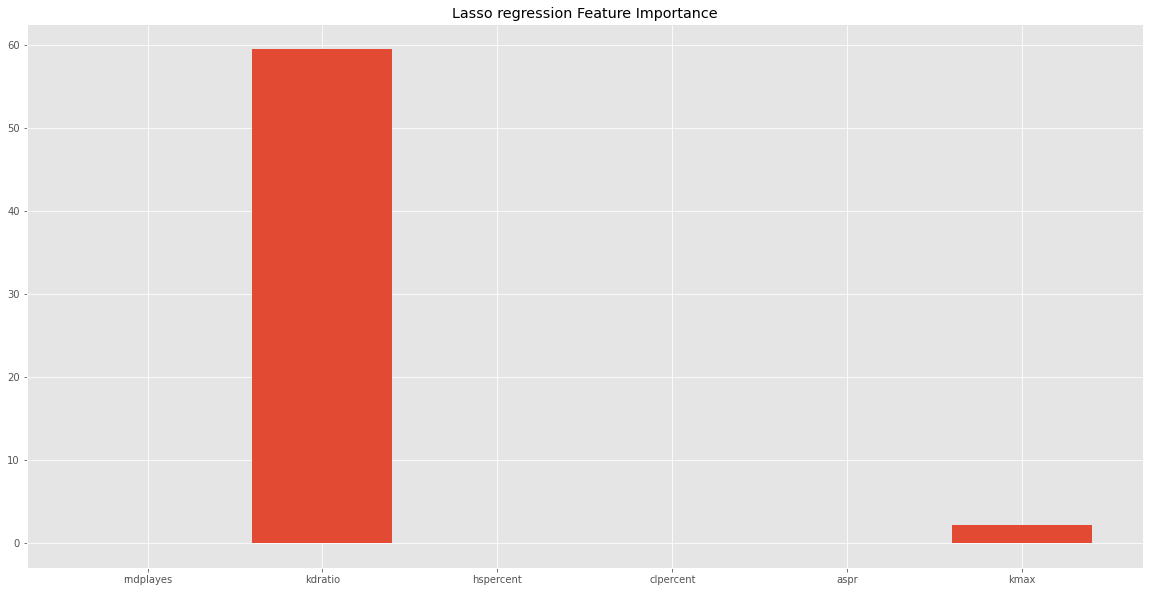

In [593]:
plt.figure(figsize=(20,10))
plt.title('Lasso regression Feature Importance')

plt.bar(col,lasso_model.coef_)

In [594]:
lasso = Lasso()
coefs = []
alphas = np.random.randint(0,2000,200)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(x_train,y_train)
    coefs.append(lasso.coef_)

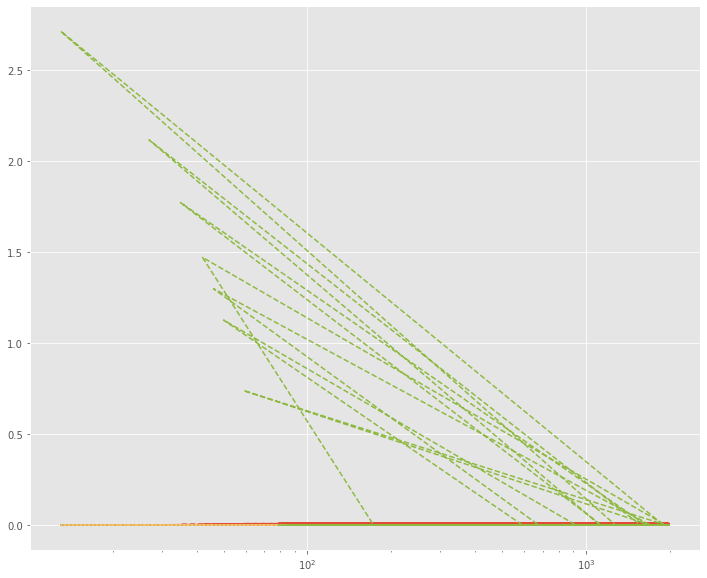

In [595]:
coefvsal = plt.gca()

coefvsal.plot(alphas, coefs,'--')
coefvsal.set_xscale("log")

In [596]:
#prediction for test and train sets
print(lasso_model.predict(x_test))
prin(lasso_model.predict(x_train))

[182.42244316 200.20487914 166.84302054 188.18075852 193.88402168
 189.6845096  212.78960075 206.11381407 199.17504301 182.61676592
 219.94826019 192.19595468 187.17248344 178.70762242 170.2867273
 193.06768755 173.55504664 188.97993927 136.17042343 201.50222873
 196.07490912 193.94217808 204.19827971 182.6548427  171.24800649
 179.59180988 191.83749822 175.2587384  199.52610898 167.56052392
 182.42284627 188.90266958 157.19597844 190.1297641  182.48898363
 173.72977764 194.46487085 197.9245961  219.90344935 189.37085458
 185.38890564 192.12399302 200.1497903  208.75779565 189.09479789
 188.10236332 184.88128381 188.11080396 197.63339311 146.86552397
 173.08751807 182.41398374 202.97826577 177.41017023 195.59646397
 190.32343982 181.22584759 186.92137372 173.11915192 171.66763881
 198.75120091 156.18842576 177.14215106 158.5720132  165.30983945
 180.15768134 212.5590773  199.14669247 207.27815601 169.99511181
 170.21619166 202.98339585 184.57246891 202.90339782 195.80258489
 171.543185

NameError: name 'prin' is not defined

In [ ]:
#RMSE value of predictions
y_prediction = lasso_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_prediction))

In [ ]:
#R2 score of the set
r2_score(y_test, y_prediction)

In [ ]:
df = pd.DataFrame({'Actual': y_test,'Predicted':y_prediction})
df

In [ ]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(32,20))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
plt.show()

## Random forest regression


In [ ]:
print(y.shape)
print(x.shape)
x=np.nan_to_num(x)

In [597]:
from sklearn.model_selection import train_test_split



In [643]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

      rndplayes  kdratio  hspercent  clpercent  aspr  kmax
2929      150.0     0.80       0.21       0.08  0.28  23.0
3622      260.0     0.75       0.20       0.10  0.22  18.0
1303      262.0     0.93       0.26       0.04  0.21  18.0
1881     1977.0     0.90       0.30       0.16  0.16  28.0
655       267.0     1.04       0.24       0.14  0.13  23.0
...         ...      ...        ...        ...   ...   ...
3916      240.0     0.81       0.25       0.24  0.26  21.0
1283      169.0     0.94       0.37       0.13  0.17  20.0
3714      106.0     0.85       0.17       0.12  0.18  18.0
3325      306.0     0.71       0.22       0.11  0.27  26.0
1414     1121.0     0.94       0.20       0.13  0.22  24.0

[3362 rows x 6 columns]
2929    176.9
3622    165.3
1303    201.4
1881    192.0
655     216.3
        ...  
3916    157.7
1283    202.1
3714    163.0
3325    170.9
1414    199.4
Name: acs, Length: 3362, dtype: float64
      rndplayes  kdratio  hspercent  clpercent  aspr  kmax
134      2096.

Text(0, 0.5, 'acs')

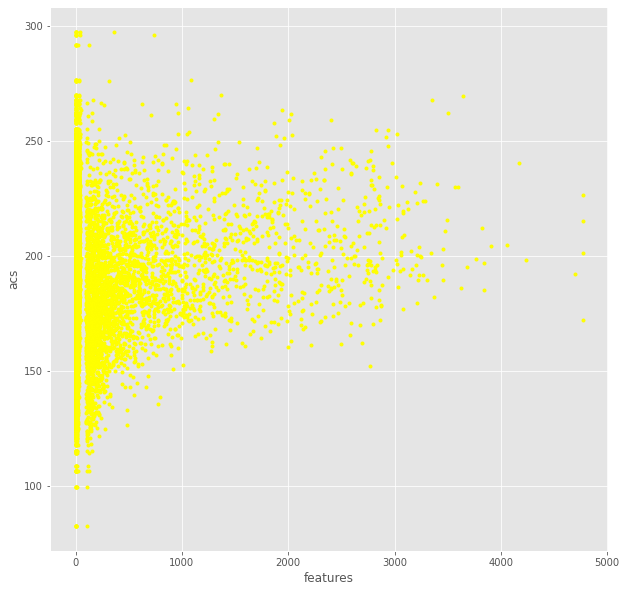

In [644]:
plt.plot(x_train,y_train,'.',color='yellow')
plt.xlabel("features")
plt.ylabel("acs")

Text(0, 0.5, 'acs')

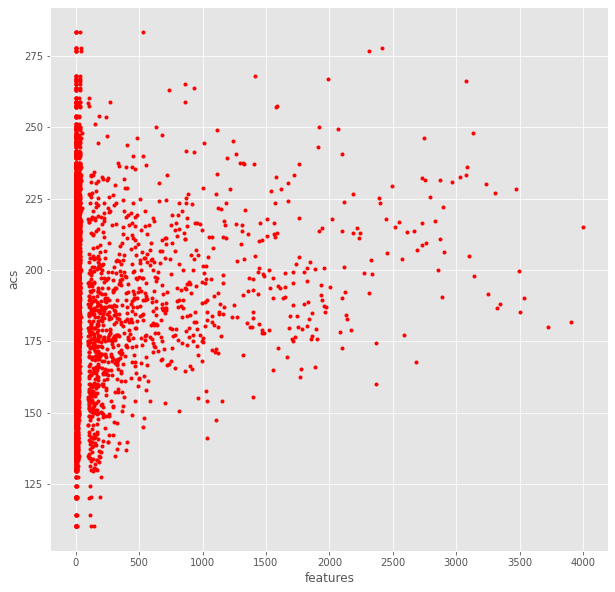

In [645]:
plt.plot(x_test,y_test,'.',color='red')
plt.xlabel("features")
plt.ylabel("acs")

In [646]:
rf = RandomForestRegressor(n_estimators=500,random_state=42, max_depth=5)
model=rf.fit(x_train, y_train)
print(model)

RandomForestRegressor(max_depth=5, n_estimators=500, random_state=42)


In [647]:
predictions = rf.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 9.99


In [648]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.6 %.


In [649]:
importance=rf.feature_importances_
importance

array([0.01773037, 0.95736064, 0.00246218, 0.003912  , 0.01298158,
       0.00555324])

In [650]:
df=dataset.columns
print(df)
col=df.tolist()
print(col)
col.remove('acs')
col.remove('Player name')


Index(['Player name', 'rndplayes', 'acs', 'kdratio', 'hspercent', 'clpercent',
       'aspr', 'kmax'],
      dtype='object')
['Player name', 'rndplayes', 'acs', 'kdratio', 'hspercent', 'clpercent', 'aspr', 'kmax']


Text(0.5, 1.0, 'Random Forest Feature importance')

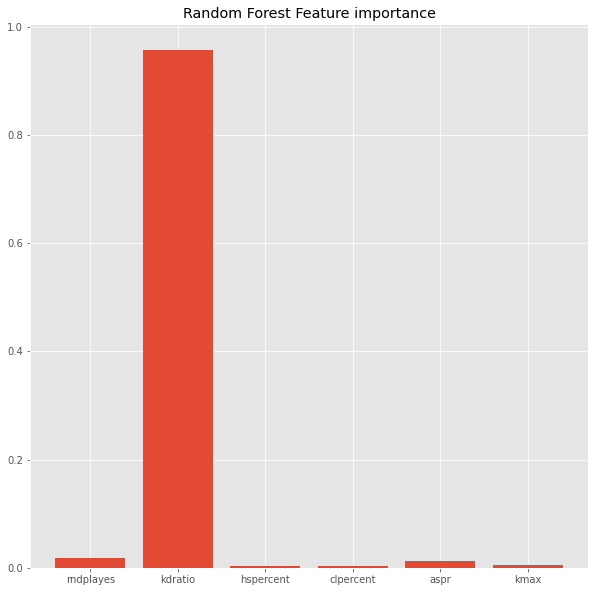

In [651]:
plt.bar(col, importance)
plt.title("Random Forest Feature importance")

In [652]:
df = pd.DataFrame({'Actual': y_test,'Predicted': predictions})
df

,Actual,Predicted
134,240.8,239.827780
526,220.2,204.354074
4190,148.9,145.060619
3165,173.3,180.932103
2213,187.2,201.006466
...,...,...
4467,120.3,142.635352
3111,174.3,186.301701
1977,190.4,194.619033
4404,132.8,127.722716


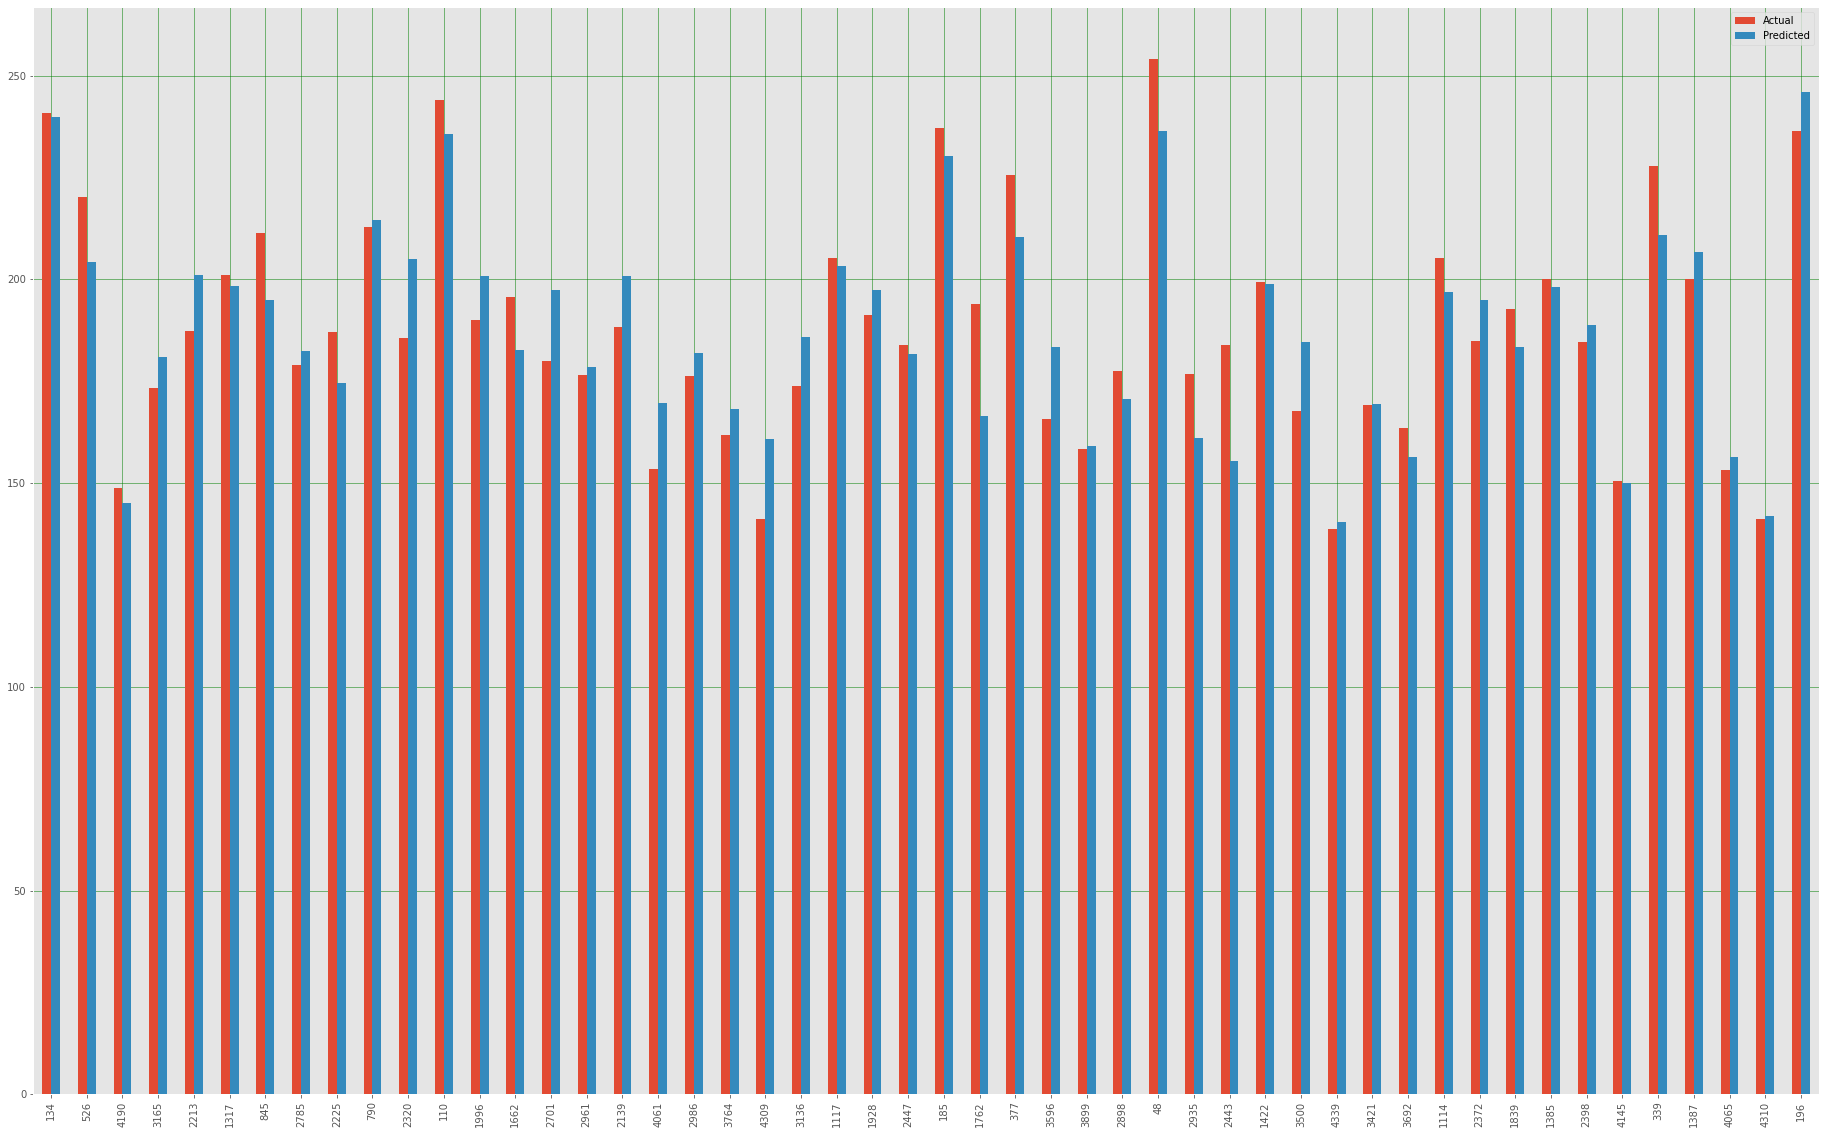

In [653]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(32,20))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## XGBOOST regression


In [654]:
dataset=pd.read_csv('pdata.csv')
x1=dataset.drop('Player name',axis=1)
x1=x1.astype(float)
x=x1.drop('acs',axis=1)
x
y=x1['acs']
y

0       297.4
1       296.0
2       291.5
3       283.5
4       277.9
        ...  
4478    108.7
4479    106.6
4480    106.3
4481     99.7
4482     82.5
Name: acs, Length: 4483, dtype: float64

In [610]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [655]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Text(0, 0.5, 'acs')

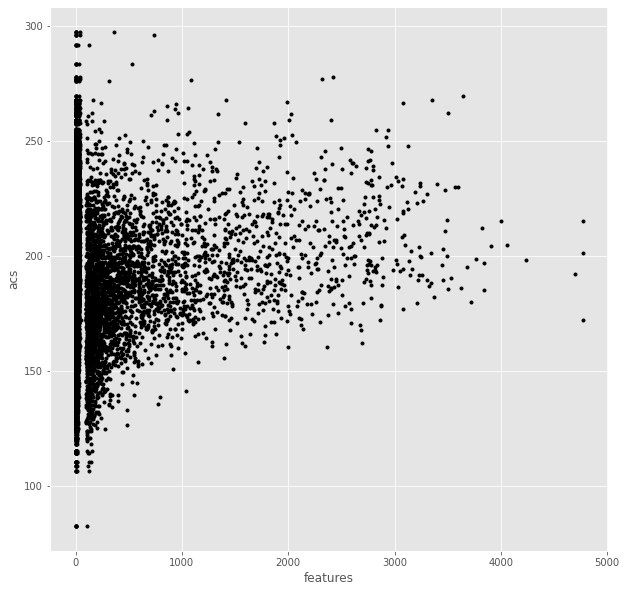

In [656]:
plt.plot(x_train,y_train,'.',color='black')
plt.xlabel("features")
plt.ylabel("acs")

Text(0, 0.5, 'acs')

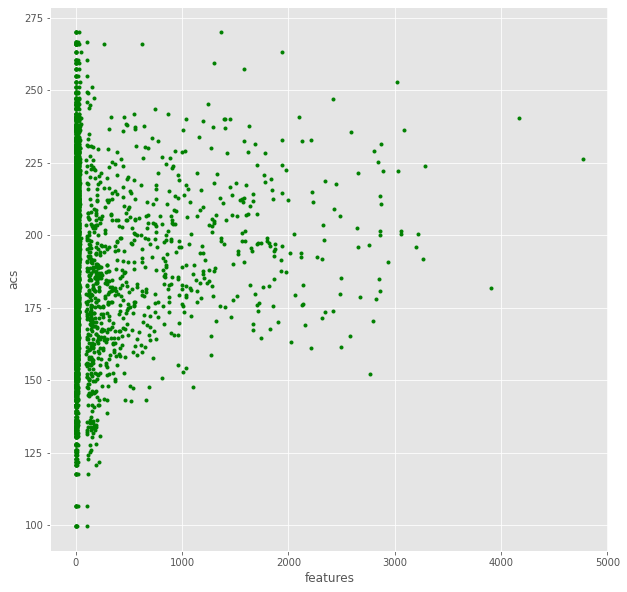

In [657]:
plt.plot(x_test,y_test,'.',color='green')
plt.xlabel("features")
plt.ylabel("acs")

In [658]:
model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 500)
model.fit(x_train, y_train)
print(); print(model)

[21:32:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)


In [659]:
y_train=np.nan_to_num(y_train)
x_train=np.nan_to_num(x_train)
y_test=np.nan_to_num(y_test)
x_test=np.nan_to_num(x_test)
y_train=y_train.astype(int)
x_test=x_test.astype(int)
x_train=x_train.astype(int)
y_test=y_test.astype(int)

In [660]:
predicted_y = model.predict(x_test)
print (predicted_y)


[194.35643  104.30089  196.9189   108.19775  117.99152  107.501274
 193.25314  107.68775  193.01225  107.501274 105.48513  107.501274
 200.41577  109.87055  113.73417  103.99705  105.490074 108.74702
 102.83271  106.56577  107.168846 197.95831  108.73145  112.6736
 117.35728  107.501274 114.07298  107.28774  104.59342  105.43463
 105.69355  111.36324  105.437004 117.07181  198.98135  119.08909
 109.024895 193.73132  192.96088  106.63861  112.589424 202.49022
 197.6289   108.1265   202.22435  105.1786   197.69235  108.526344
 109.36574  110.100426 108.19775  120.10615  111.424446 103.677574
 119.59865  108.07438  108.3498   189.09819  197.60973  115.01711
 111.36117  204.69522  106.93159  195.36955  108.64841  106.77555
 108.34668  107.71862  110.55202  187.11043  102.947365 115.641495
 116.53658  108.554634 111.156044 108.24239  196.19086   99.642204
 107.33388  111.36324  110.19025  107.54766  111.54091  106.66149
  99.343956 114.87838  104.21633  107.689186 108.82818  106.32507
 110.

In [661]:
df = pd.DataFrame({'Actual': y_test,'Predicted': predicted_y})
df

,Actual,Predicted
0,239,194.356430
1,156,104.300888
2,207,196.918900
3,205,108.197746
4,214,117.991524
...,...,...
892,187,108.114449
893,176,106.667580
894,148,107.767181
895,147,102.300667


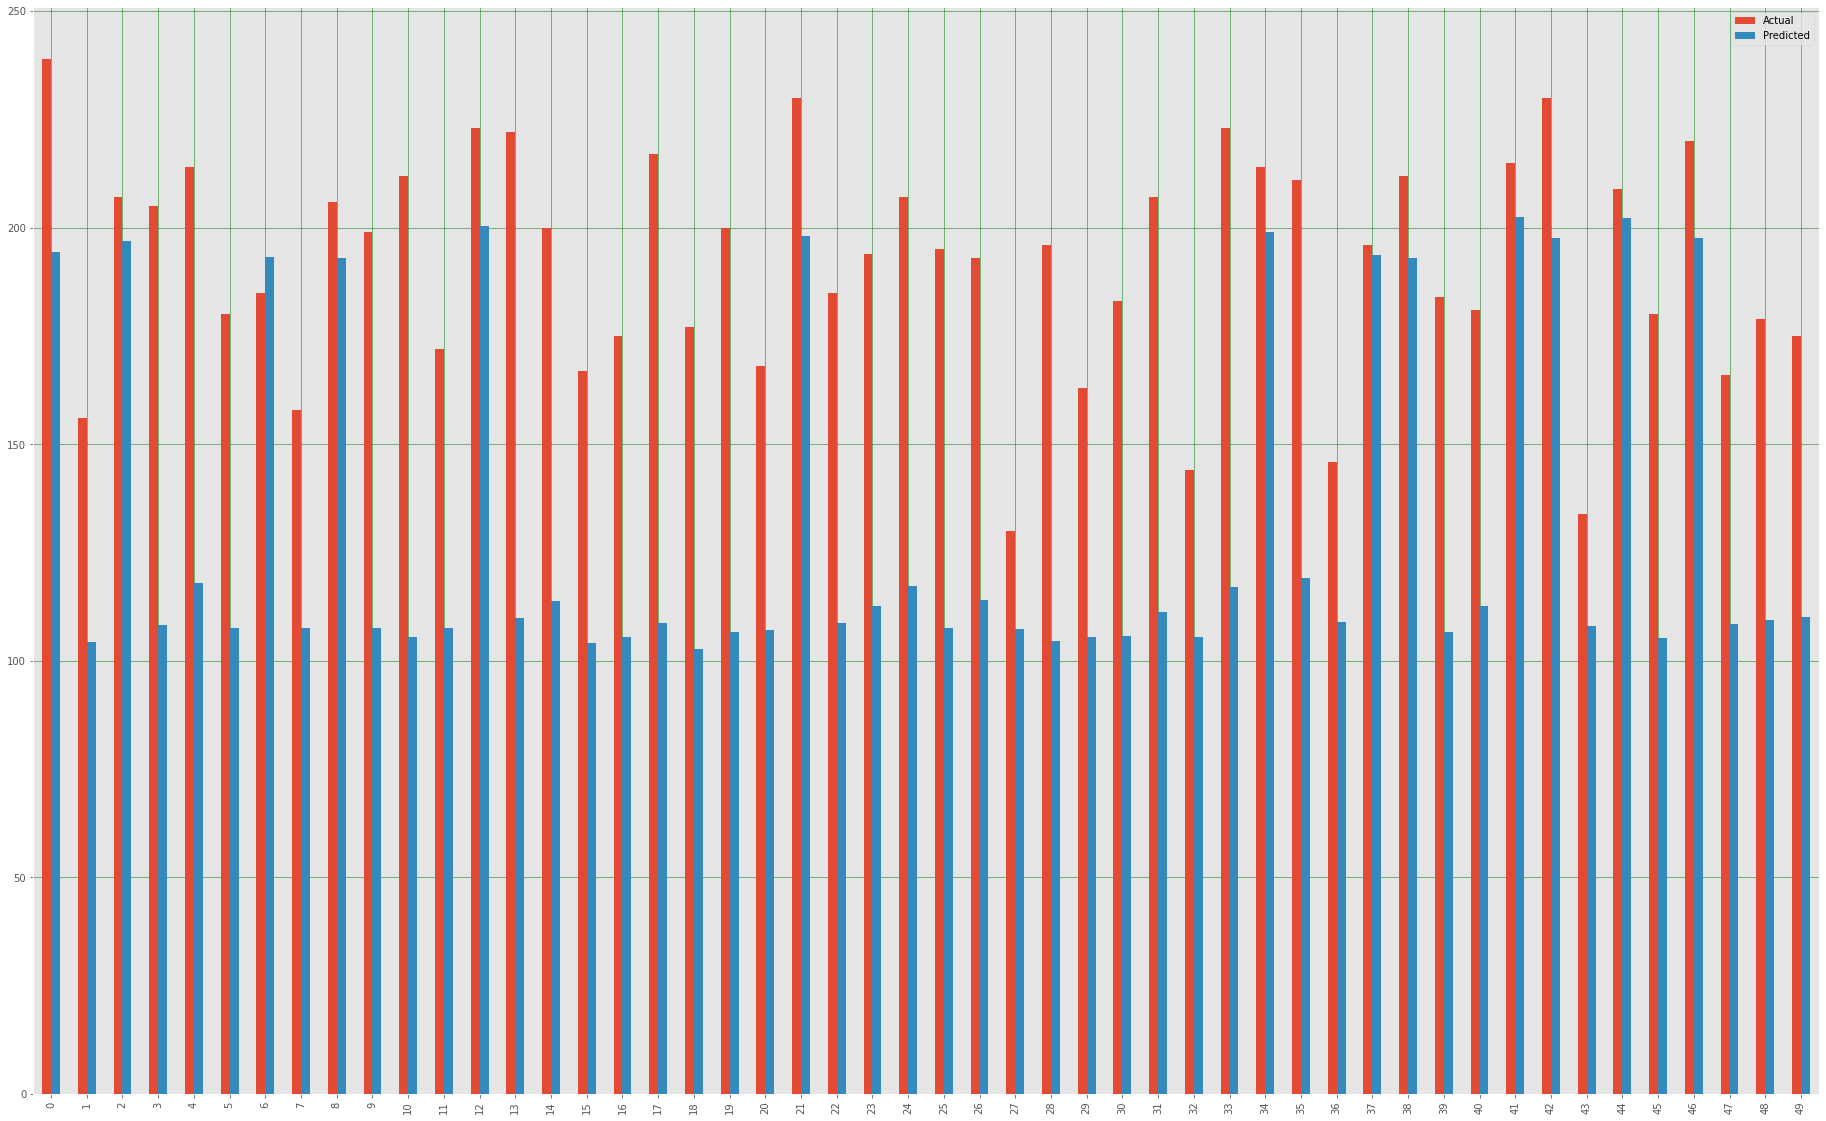

In [662]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(32,20))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [663]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_y))
print("RMSE: %f" % (rmse))

RMSE: 66.994176


In [664]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=1000,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[21:32:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [665]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,170.699046,0.184641,170.714778,0.391489
1,154.043243,0.164432,154.049871,0.421580
2,139.066757,0.155698,139.063761,0.408967
3,125.646767,0.161703,125.637093,0.390323
4,113.629962,0.153767,113.620661,0.401494


In [666]:
print((cv_results["test-rmse-mean"]).tail(1))

373    12.930122
Name: test-rmse-mean, dtype: float64


In [667]:
xg_reg = xgb.train(params, dtrain=data_dmatrix, num_boost_round=10)

[21:32:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


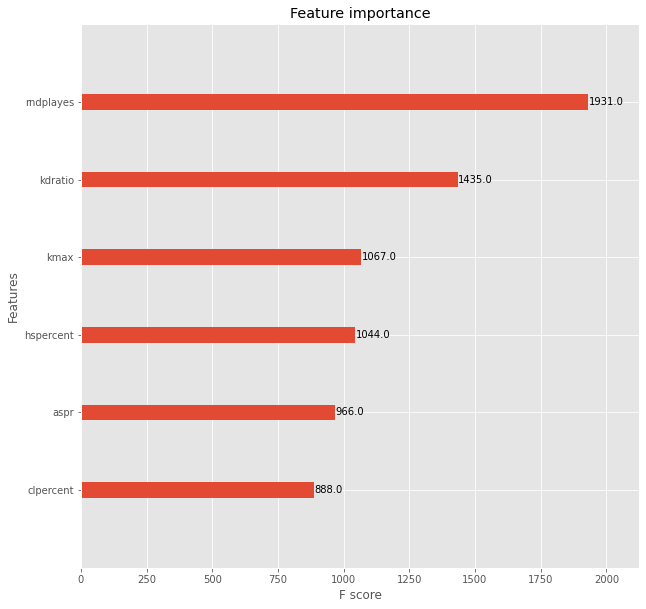

In [668]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

## accuracy of this model


In [669]:
#Accuracy
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(model, x_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())



[21:32:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:18

## lightGBM regression model

In [670]:
data = pd.read_csv('pdata.csv')
print(data.head())
# define input and output feature
x1=data.drop('Player name',axis=1)
x1=x1.astype(float)
x=x1.drop('acs',axis=1)
x
y=x1['acs']
y

  Player name  rndplayes    acs  kdratio  hspercent  clpercent  aspr  kmax
0   something        364  297.4     1.45       0.21       0.12  0.16    43
1      enerii        737  296.0     1.43       0.23       0.18  0.25    39
2     alcoacH        131  291.5     1.30       0.30       0.09  0.18    27
3     Kohaibi        529  283.5     1.44       0.22       0.22  0.20    33
4      mwzera       2417  277.9     1.32       0.16       0.17  0.22    38


0       297.4
1       296.0
2       291.5
3       283.5
4       277.9
        ...  
4478    108.7
4479    106.6
4480    106.3
4481     99.7
4482     82.5
Name: acs, Length: 4483, dtype: float64

In [671]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()     
le.fit_transform(y) 

array([1158, 1157, 1156, ...,    2,    1,    0], dtype=int64)

In [679]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [680]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [681]:
y_train=np.nan_to_num(y_train)
x_train=np.nan_to_num(x_train)
y_test=np.nan_to_num(y_test)
x_test=np.nan_to_num(x_test)
y_train=y_train.astype(int)
x_test=x_test.astype(int)
x_train=x_train.astype(int)
y_test=y_test.astype(int)

In [682]:
import lightgbm as lgb
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [683]:
model = ltb.LGBMRegressor(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 500)
model.fit(x_train, y_train)
print(); print(model)

expected_y  = y_test
predicted_y = model.predict(x_test)


LGBMRegressor(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=500)


In [684]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

0.7646746878836228
0.0047015425715044605


C:\Users\Garima\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='acs'>

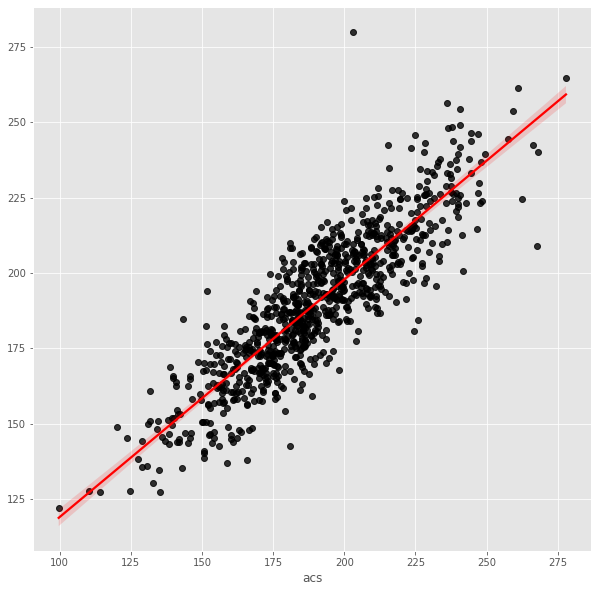

In [685]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"color": "black" },line_kws={"color": "red"})

In [686]:
df=data.columns.drop('Player name','acs')
print(df)
col=df.tolist()
col.remove('acs')
print(col)

Index(['rndplayes', 'acs', 'kdratio', 'hspercent', 'clpercent', 'aspr',
       'kmax'],
      dtype='object')
['rndplayes', 'kdratio', 'hspercent', 'clpercent', 'aspr', 'kmax']


## Feature importance in LightGBM

Text(0, 0.5, 'features')

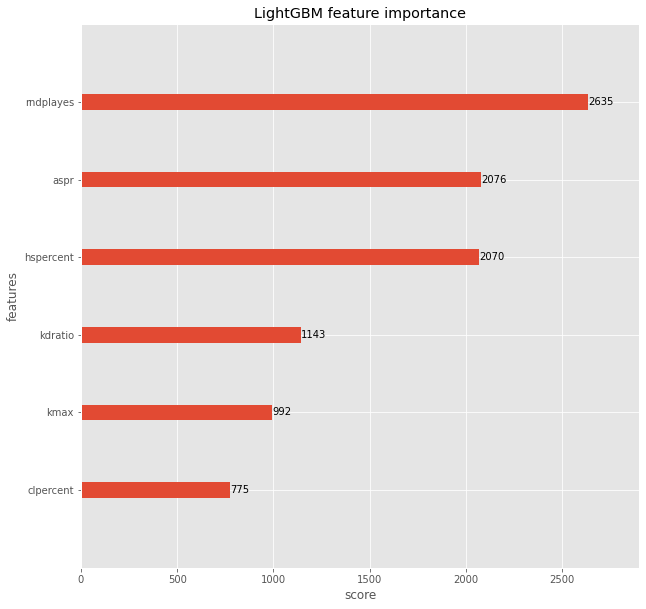

In [687]:
ltb.plot_importance(model)
plt.title("LightGBM feature importance")
plt.xlabel('score')
plt.ylabel('features')

In [688]:
df = pd.DataFrame({'Actual': y_test,'Predicted': predicted_y})
df

,Actual,Predicted
916,209.6,205.112156
3454,168.7,180.496466
3605,165.6,175.318641
1215,203.5,207.436329
3892,158.5,178.118384
...,...,...
3584,165.9,156.198567
2815,178.6,184.710467
3024,175.6,160.219299
2828,178.5,191.595190


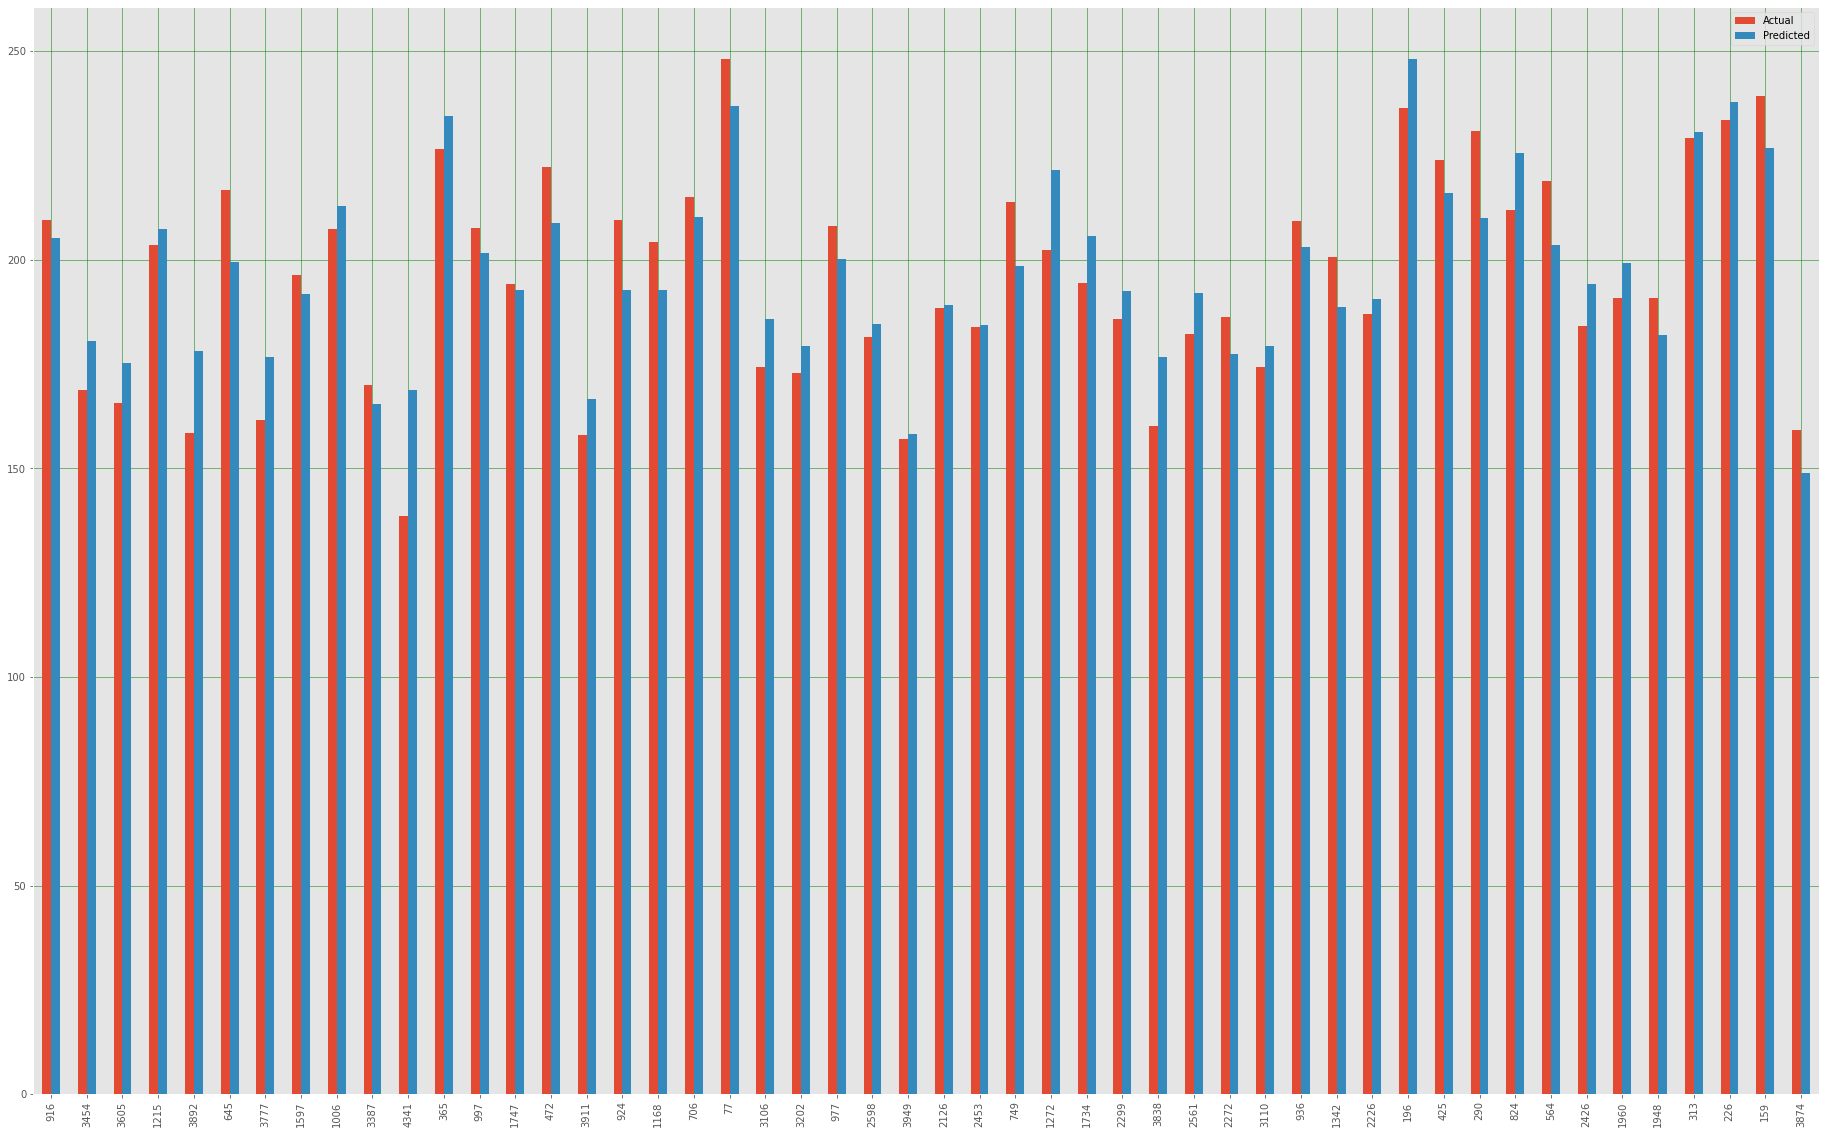

In [689]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(32,20))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<AxesSubplot:>

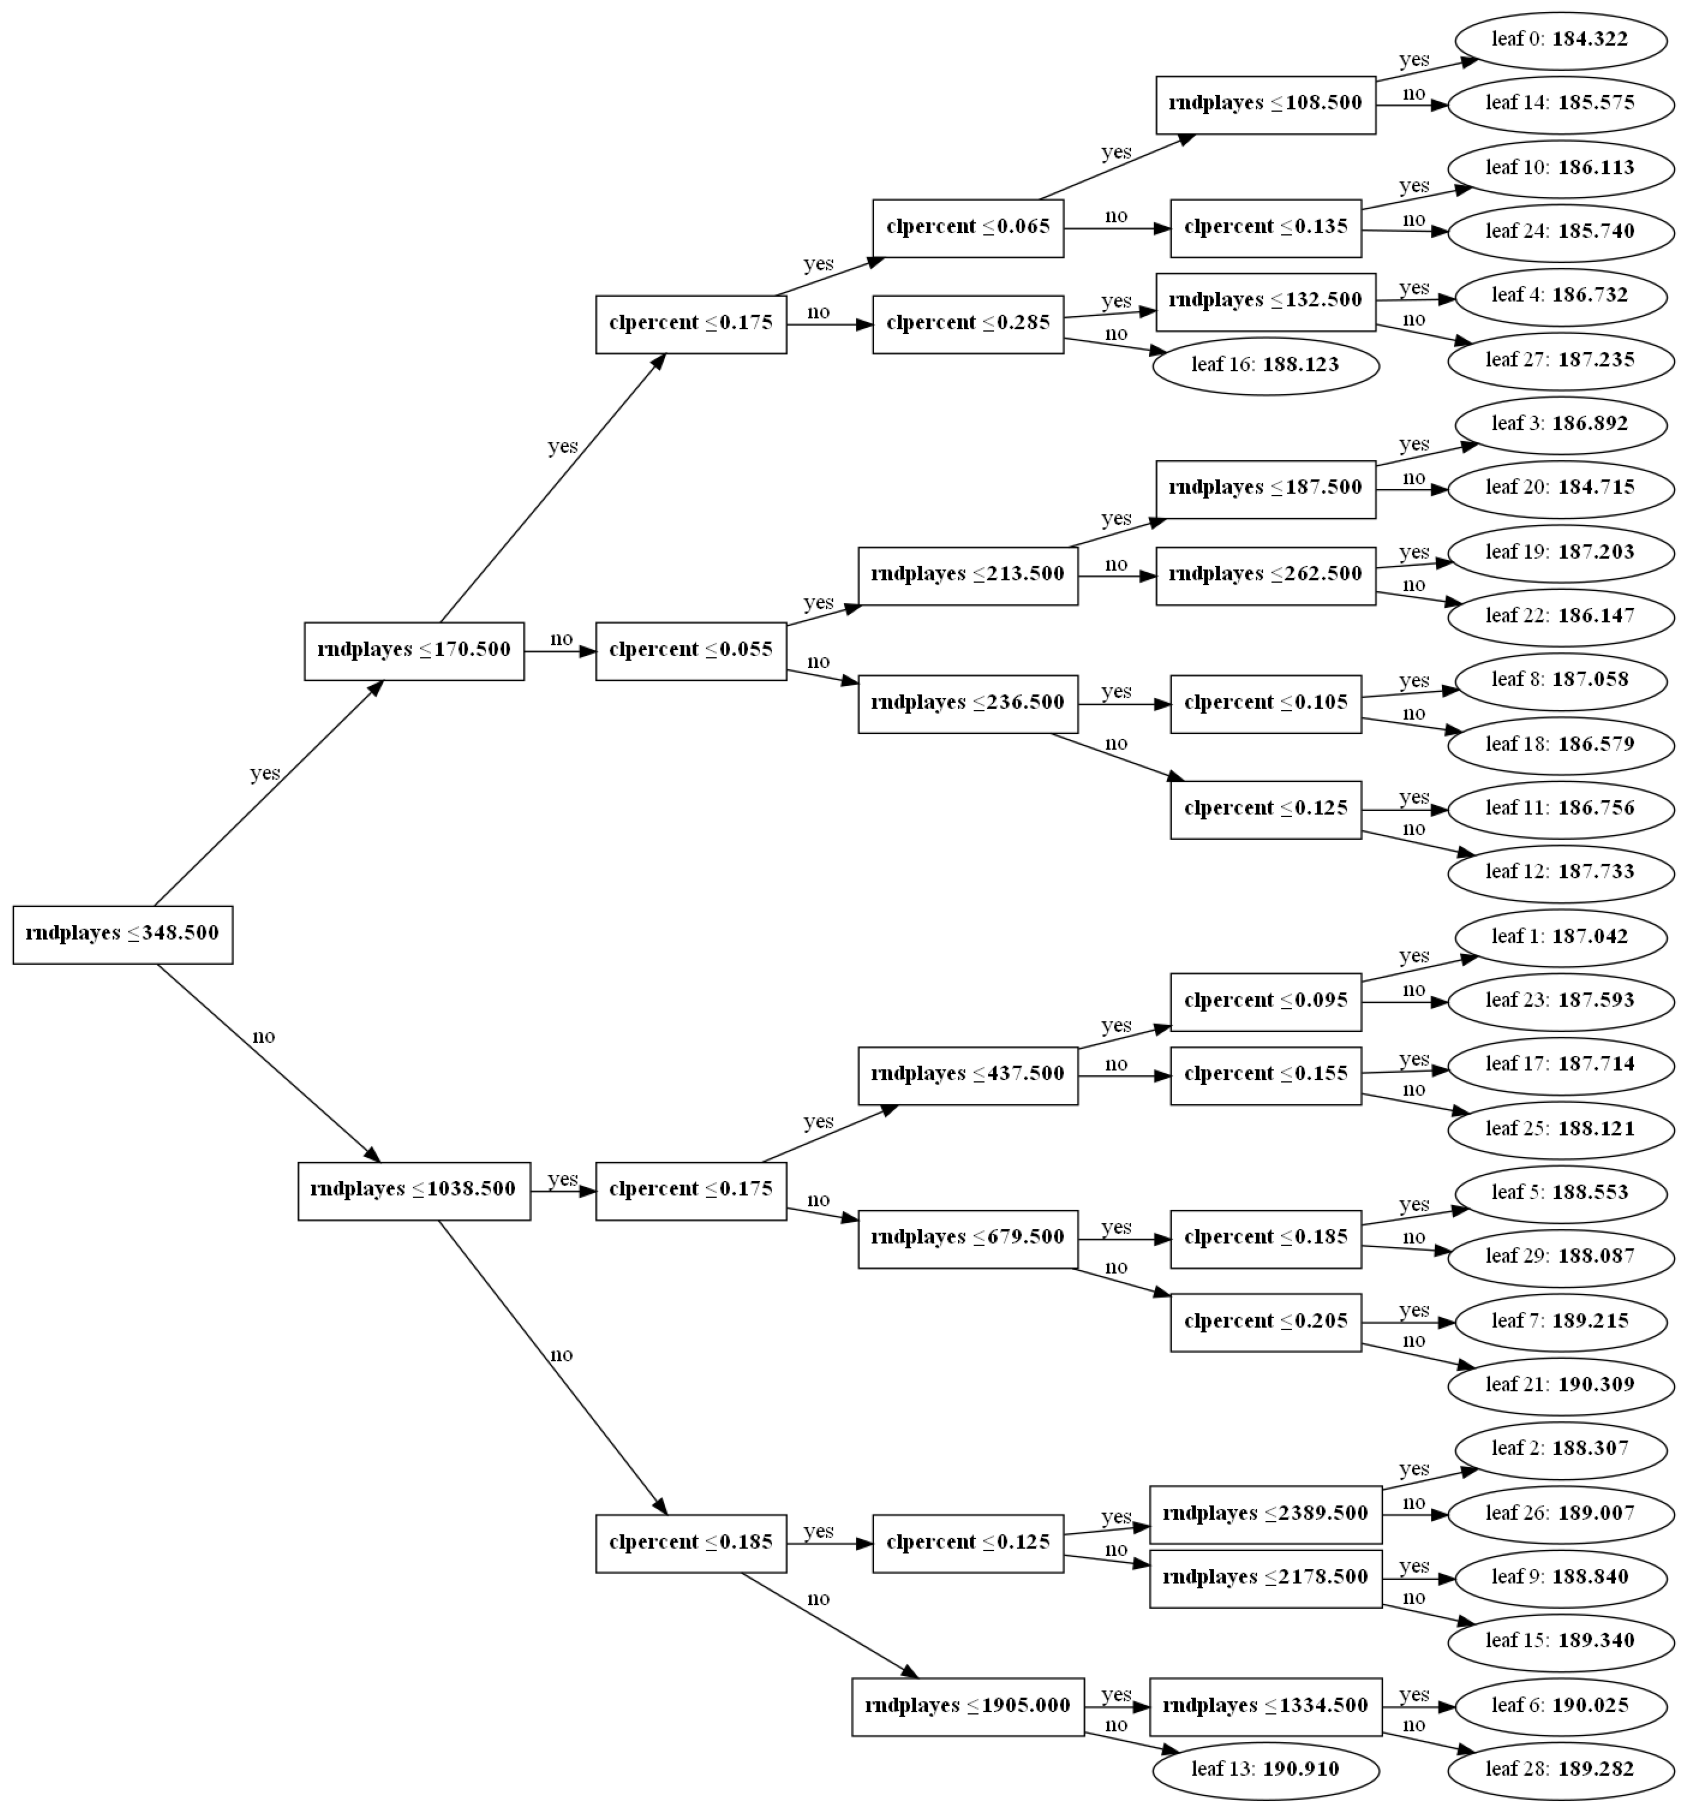

In [690]:
lgb.plot_tree(model,figsize=(30,40))

## accuracy of this model


In [691]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Final accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.8882
Final accuracy 0.7647
